In [ ]:
%load_ext autoreload
%autoreload 2

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from wittgenstein import RIPPER

from utils.constants import STAGE_DIR, ANALYSIS_DIR
from utils.dataload import load_data
from utils.display import cdisplay
from utils.functions import split_train_test, tree_structure
from utils.plots import decision_boundary_plot
from utils.transformers import SequentialFeatureSelectorTransformer

# Configuration

In [169]:
RUN_WRAPPER_SELECTION = False

# Load data

In [ ]:
# Load all dataset
X_all = load_data(
    STAGE_DIR / 'preprocess' / 'X_train.parquet',
    load_func=pd.read_parquet).sort_index()

# Load selected dataset using univariate analysis
X_mi = load_data(
    STAGE_DIR / 'selection' / 'X_train_mi.parquet',
    load_func=pd.read_parquet).sort_index()

X_x2 = load_data(
    STAGE_DIR / 'selection' / 'X_train_x2.parquet',
    load_func=pd.read_parquet).sort_index()

X_anova = load_data(
    STAGE_DIR / 'selection' / 'X_train_anova.parquet',
    load_func=pd.read_parquet).sort_index()

# Load selected dataset using multivariate analysis
X_relief = load_data(
    STAGE_DIR / 'selection' / 'X_train_relief.parquet',
    load_func=pd.read_parquet).sort_index()

In [ ]:
y = load_data(
    STAGE_DIR / 'preprocess' / 'y.parquet',
    load_func=pd.read_parquet).sort_index()

In [ ]:
X_train_all, X_test_all, y_train_all, y_test_all = split_train_test(X_all, y)
X_train_mi, X_test_mi, y_train_mi, y_test_mi = split_train_test(X_mi, y)
X_train_x2, X_test_x2, y_train_x2, y_test_x2 = split_train_test(X_x2, y)
X_train_anova, X_test_anova, y_train_anova, y_test_anova = split_train_test(X_anova, y)
X_train_relief, X_test_relief, y_train_relief, y_test_relief = split_train_test(X_relief, y)

# Support Vector Machine

The training occurs in a SVM model with polynomial kernel. The in-sample scores are calculated using a cross validation method with 5 validation steps. The accuracy is used as the metric to evaluate the model performance.

## All features

### Training and score in the sample (80% - 0.01 std)

In [ ]:
svm_all = SVC(kernel='poly')
svm_all_scores = cross_val_score(
    svm_all,
    X_train_all,
    y_train_all['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_all_scores.mean(),
    svm_all_scores.std())
)

### Out-of-sample score

In [ ]:
svm_all = SVC(kernel='poly').fit(X_train_all, y_train_all['y'])
y_test_predict_all = svm_all.predict(X_test_all)

print(classification_report(y_test_all['y'], y_test_predict_all))

### Decision boundary

In [ ]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_all, y_train_all,
    'SVM with all features'
)

## Univariate - Mutual Information

### Training and score in the sample (80% - 0.01 std)

In [ ]:
svm_mi = SVC(kernel='poly')
svm_mi_scores = cross_val_score(
    svm_mi,
    X_train_mi,
    y_train_mi['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_mi_scores.mean(),
    svm_mi_scores.std())
)

### Out-of-sample score

In [ ]:
svm_mi = SVC(kernel='poly').fit(X_train_mi, y_train_mi['y'])
y_test_predict_mi = svm_mi.predict(X_test_mi)

print(classification_report(y_test_mi['y'], y_test_predict_mi))

### Decision boundary

In [ ]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_mi, y_train_mi,
    'SVM with selected features (MI)'
)

## Univariate - $\chi^2$

### Training and score in the sample (78% - 0.01 std)

In [ ]:
svm_x2 = SVC(kernel='poly')
svm_x2_scores = cross_val_score(
    svm_x2,
    X_train_x2,
    y_train_x2['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_x2_scores.mean(),
    svm_x2_scores.std())
)

### Out-of-sample score

In [ ]:
svm_x2 = SVC(kernel='poly').fit(X_train_x2, y_train_x2['y'])
y_test_predict_x2 = svm_x2.predict(X_test_x2)

print(classification_report(y_test_x2['y'], y_test_predict_x2))

### Decision boundary

In [ ]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_x2, y_train_x2,
    'SVM with selected features (X2)'
)

## Univariate - ANOVA

### Training and score in the sample (80% - 0.02 std)

In [ ]:
svm_anova = SVC(kernel='poly')
svm_anova_scores = cross_val_score(
    svm_anova,
    X_train_anova,
    y_train_anova['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_anova_scores.mean(),
    svm_anova_scores.std())
)

### Out-of-sample score

In [ ]:
svm_anova = SVC(kernel='poly').fit(X_train_anova, y_train_anova['y'])
y_test_predict_anova = svm_anova.predict(X_test_anova)

print(classification_report(y_test_anova['y'], y_test_predict_anova))

### Decision boundary

In [ ]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_anova, y_train_anova,
    'SVM with selected features (ANOVA)'
)

## Multivariate - Relief

### Training and score in the sample (78% - 0.1 std)

In [ ]:
svm_relief = SVC(kernel='poly')
svm_relief_scores = cross_val_score(
    svm_relief,
    X_train_relief,
    y_train_relief['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_relief_scores.mean(),
    svm_relief_scores.std())
)

### Out-of-sample score

In [ ]:
svm_relief = SVC(kernel='poly').fit(X_train_relief, y_train_relief['y'])
y_test_predict_relief = svm_relief.predict(X_test_relief)

print(classification_report(y_test_relief['y'], y_test_predict_relief))

### Decision boundary

In [ ]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_relief, y_train_relief,
    'SVM with selected features (RELIEF)'
)

## Wrapper

### Select features

In [ ]:
if RUN_WRAPPER_SELECTION:
    svm_wrapper = SVC(kernel='poly')

    svm_fs_wrapper = SequentialFeatureSelectorTransformer(
        svm_wrapper, n_features_to_select=75)

    print('Fitting model. This may take a while...')
    X_svm_wrapper = svm_fs_wrapper.fit_transform(X_all, y['y'])
    print('We have a winner!')

    X_train_svm_wrapper, X_test_svm_wrapper, y_train_svm_wrapper, y_test_svm_wrapper = split_train_test(X_svm_wrapper, y)

    X_svm_wrapper.to_parquet(STAGE_DIR / 'selection' / 'X_train_svm.parquet')

### Training and score in the sample (80% - 0.1 std)

In [ ]:
if not RUN_WRAPPER_SELECTION:
    X_svm_wrapper = pd.read_parquet(STAGE_DIR / 'selection' / 'X_train_svm.parquet')
    X_train_svm_wrapper, X_test_svm_wrapper, y_train_svm_wrapper, y_test_svm_wrapper = split_train_test(X_svm_wrapper, y)

In [ ]:
svm_wrapper_scores = cross_val_score(
    svm_wrapper,
    X_train_svm_wrapper,
    y_train_svm_wrapper['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_wrapper_scores.mean(),
    svm_wrapper_scores.std())
)

### Out-of-sample score

In [ ]:
svm_wrapper = SVC(kernel='poly').fit(X_train_svm_wrapper, y_train_svm_wrapper['y'])
y_test_predict_svm_wrapper = svm_wrapper.predict(X_test_svm_wrapper)

print(classification_report(y_test_svm_wrapper['y'], y_test_predict_svm_wrapper))

### Decision boundary

In [ ]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_svm_wrapper, y_train_svm_wrapper,
    'SVM with selected features (SFS)'
)

# Classification Tree

We use a Decision Tree model with entropy criterion and 10 levels of depth. The in-sample scores are calculated using a cross validation method with 5 folds. The accuracy is used as the metric to evaluate the model performance.

In [ ]:
tree_parameters = {
    'criterion': 'entropy',
    'max_depth': 5
}

## All features

### Training and score in the sample (78% - 0.00 std)

In [ ]:
tree_all = DecisionTreeClassifier(**tree_parameters)
tree_all_scores = cross_val_score(
    tree_all,
    X_train_all,
    y_train_all['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    tree_all_scores.mean(),
    tree_all_scores.std())
)

### Out-of-sample score

In [ ]:
tree_all = DecisionTreeClassifier(**tree_parameters).fit(X_train_all, y_train_all['y'])
y_test_predict_tree_all = tree_all.predict(X_test_all)

print(classification_report(y_test_all['y'], y_test_predict_tree_all))

### Tree structure

In [ ]:
tree_structure(tree_all, X_train_all.columns.values)

In [ ]:
fig = plt.figure(figsize=(63, 40))
_ = plot_tree(tree_all,
              feature_names=X_train_all.columns,  
              class_names=['non-poor', 'poor'],
              filled=True,
              fontsize=10)

In [ ]:
fig.savefig(ANALYSIS_DIR / 'images' /'tree_all.svg', format='svg', dpi=1e5)

## Univariate - Mutual Information

### Training and score in the sample (78% - 0.01 std)

In [ ]:
tree_mi = DecisionTreeClassifier(**tree_parameters)
tree_mi_scores = cross_val_score(
    tree_mi,
    X_train_mi,
    y_train_mi['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    tree_mi_scores.mean(),
    tree_mi_scores.std())
)

### Out-of-sample score

In [ ]:
tree_mi = DecisionTreeClassifier(**tree_parameters).fit(X_train_mi, y_train_mi['y'])
y_test_predict_tree_mi = tree_mi.predict(X_test_mi)

print(classification_report(y_test_mi['y'], y_test_predict_tree_mi))

### Tree structure

In [ ]:
tree_structure(tree_mi, X_train_mi.columns.values)

In [ ]:
fig = plt.figure(figsize=(53, 40))
_ = plot_tree(tree_mi,
              feature_names=X_train_mi.columns,  
              class_names=['non-poor', 'poor'],
              filled=True,
              fontsize=10)

In [ ]:
fig.savefig(ANALYSIS_DIR / 'images' /'tree_mi.svg', format='svg', dpi=1e5)

## Univariate - $\chi^2$

### Training and score in the sample (78% - 0.01 std)

In [ ]:
tree_x2 = DecisionTreeClassifier(**tree_parameters)
tree_x2_scores = cross_val_score(
    tree_x2,
    X_train_x2,
    y_train_x2['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    tree_x2_scores.mean(),
    tree_x2_scores.std())
)

### Out-of-sample score

In [ ]:
tree_x2 = DecisionTreeClassifier(
        **tree_parameters
    ).fit(X_train_x2, y_train_x2['y'])
y_test_predict_tree_x2 = tree_x2.predict(X_test_x2)

print(classification_report(y_test_x2['y'], y_test_predict_tree_x2))

### Tree structure

In [ ]:
tree_structure(tree_x2, X_train_x2.columns.values)

In [ ]:
fig = plt.figure(figsize=(75, 40))
_ = plot_tree(tree_x2,
              feature_names=X_train_x2.columns,  
              class_names=['non-poor', 'poor'],
              filled=True,
              fontsize=10)

In [ ]:
fig.savefig(ANALYSIS_DIR / 'images' /'tree_x2.svg', format='svg', dpi=1e5)

## Univariate - ANOVA

### Training and score in the sample (78% - 0.01 std)

In [ ]:
tree_anova = DecisionTreeClassifier(**tree_parameters)
tree_anova_scores = cross_val_score(
    tree_anova,
    X_train_anova,
    y_train_anova['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    tree_anova_scores.mean(),
    tree_anova_scores.std())
)

### Out-of-sample score

In [ ]:
tree_anova = DecisionTreeClassifier(
    **tree_parameters
).fit(X_train_anova, y_train_anova['y'])
y_test_predict_tree_anova = tree_anova.predict(X_test_anova)

print(classification_report(y_test_anova['y'], y_test_predict_tree_anova))

### Tree structure

In [ ]:
tree_structure(tree_anova, X_train_anova.columns.values)

In [ ]:
fig = plt.figure(figsize=(45, 40))
_ = plot_tree(tree_anova,
              feature_names=X_train_anova.columns,  
              class_names=['non-poor', 'poor'],
              filled=True,
              fontsize=10)

In [ ]:
fig.savefig(ANALYSIS_DIR / 'images' /'tree_anova.svg', format='svg', dpi=1e5)

## Multivariate - Relief

### Training and score in the sample (77% - 0.01 std)

In [ ]:
tree_relief = DecisionTreeClassifier(**tree_parameters)
tree_relief_scores = cross_val_score(
    tree_relief,
    X_train_relief,
    y_train_relief['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    tree_relief_scores.mean(),
    tree_relief_scores.std())
)

### Out-of-sample score

In [ ]:
tree_relief = DecisionTreeClassifier(**tree_parameters).fit(X_train_relief, y_train_relief['y'])
y_test_predict_tree_relief = tree_relief.predict(X_test_relief)

print(classification_report(y_test_relief['y'], y_test_predict_tree_relief))

### Tree structure

In [ ]:
tree_structure(tree_relief, X_train_relief.columns.values)

In [ ]:
fig = plt.figure(figsize=(48, 40))
_ = plot_tree(tree_relief,
              feature_names=X_train_relief.columns,  
              class_names=['non-poor', 'poor'],
              filled=True,
              fontsize=10)

In [ ]:
fig.savefig(ANALYSIS_DIR / 'images' /'tree_relief.svg', format='svg', dpi=1e5)

## Wrapper

### Select features

In [ ]:
if RUN_WRAPPER_SELECTION:
    tree_wrapper = DecisionTreeClassifier()

    tree_fs_wrapper = SequentialFeatureSelectorTransformer(
        tree_wrapper, n_features_to_select=75)

    print('Fitting model. This may take a while...')
    X_tree_wrapper = tree_fs_wrapper.fit_transform(X_all, y['y'])
    print('We have a winner!')

    X_train_tree_wrapper, X_test_tree_wrapper, y_train_tree_wrapper, y_test_tree_wrapper = split_train_test(X_tree_wrapper, y)
    X_tree_wrapper.to_parquet(STAGE_DIR / 'selection' / 'X_train_tree.parquet')

### Training and score in the sample (79% - 0.01 std)

In [ ]:
if not RUN_WRAPPER_SELECTION:
    X_tree_wrapper = pd.read_parquet(STAGE_DIR / 'selection' / 'X_train_tree.parquet')
    X_train_tree_wrapper, X_test_tree_wrapper, y_train_tree_wrapper, y_test_tree_wrapper = split_train_test(X_tree_wrapper, y)

In [ ]:
tree_wrapper = DecisionTreeClassifier(**tree_parameters)
tree_wrapper_scores = cross_val_score(
    tree_wrapper,
    X_train_tree_wrapper,
    y_train_tree_wrapper['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    tree_wrapper_scores.mean(),
    tree_wrapper_scores.std())
)

### Out-of-sample score

In [ ]:
tree_wrapper = DecisionTreeClassifier(**tree_parameters).fit(X_train_tree_wrapper, y_train_tree_wrapper['y'])
y_test_predict_tree_wrapper = tree_wrapper.predict(X_test_tree_wrapper)

print(classification_report(y_test_tree_wrapper['y'], y_test_predict_tree_wrapper))

### Tree structure

In [ ]:
tree_structure(tree_wrapper, X_train_tree_wrapper.columns.values)

In [ ]:
fig = plt.figure(figsize=(53, 40))
_ = plot_tree(tree_wrapper,
              feature_names=X_train_tree_wrapper.columns,  
              class_names=['non-poor', 'poor'],
              filled=True,
              fontsize=10)

In [ ]:
fig.savefig(ANALYSIS_DIR / 'images' /'tree_wrapper.svg', format='svg', dpi=1e5)

# Rule Induction - RIPPER

The RIPPER algorithm builds a set of rules given a training data. We use the default parameters. The in-sample scores are calculated using a cross validation method with 5 folds. The accuracy is used as the metric to evaluate the model performance. 

## All features

### Training and score in the sample (78% - 0.00 std)

In [ ]:
ripper_all = RIPPER()
ripper_all_scores = cross_val_score(
    ripper_all,
    X_train_all,
    y_train_all['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    ripper_all_scores.mean(),
    ripper_all_scores.std())
)

### Out-of-sample score

In [ ]:
ripper_all = RIPPER()
ripper_all.fit(X_train_all, y_train_all['y'])
y_test_predict_ripper_all = ripper_all.predict(X_test_all)

print(classification_report(y_test_all['y'], y_test_predict_ripper_all))

### Ruleset

In [ ]:
ripper_all.out_model()

## Univariate - Mutual Information

### Training and score in the sample (79% - 0.01 std)

In [ ]:
ripper_mi = RIPPER()
ripper_mi_scores = cross_val_score(
    ripper_mi,
    X_train_mi,
    y_train_mi['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    ripper_mi_scores.mean(),
    ripper_mi_scores.std())
)

### Out-of-sample score

In [ ]:
ripper_mi = RIPPER()
ripper_mi.fit(X_train_mi, y_train_mi['y'])
y_test_predict_ripper_mi = ripper_mi.predict(X_test_mi)

print(classification_report(y_test_mi['y'], y_test_predict_ripper_mi))

### Ruleset

In [ ]:
ripper_mi.out_model()

## Univariate - $\chi^2$

### Training and score in the sample (78% - 0.02 std)

In [ ]:
ripper_x2 = RIPPER()
ripper_x2_scores = cross_val_score(
    ripper_x2,
    X_train_x2,
    y_train_x2['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    ripper_x2_scores.mean(),
    ripper_x2_scores.std())
)

### Out-of-sample score

In [ ]:
ripper_x2 = RIPPER()
ripper_x2.fit(X_train_x2, y_train_x2['y'])
y_test_predict_ripper_x2 = ripper_x2.predict(X_test_x2)

print(classification_report(y_test_x2['y'], y_test_predict_ripper_x2))

### Ruleset

In [ ]:
ripper_x2.out_model()

## Univariate - ANOVA

### Training and score in the sample (79% - 0.01 std)

In [ ]:
ripper_anova = RIPPER()
ripper_anova_scores = cross_val_score(
    ripper_anova,
    X_train_anova,
    y_train_anova['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    ripper_mi_scores.mean(),
    ripper_mi_scores.std())
)

### Out-of-sample score

In [ ]:
ripper_anova = RIPPER()
ripper_anova.fit(X_train_anova, y_train_anova['y'])
y_test_predict_ripper_anova = ripper_anova.predict(X_test_anova)

print(classification_report(y_test_anova['y'], y_test_predict_ripper_anova))

### Ruleset

In [ ]:
ripper_anova.out_model()

## Multivariate - Relief

### Training and score in the sample (77% - 0.01 std)

In [ ]:
ripper_relief = RIPPER()
ripper_relief_scores = cross_val_score(
    ripper_relief,
    X_train_relief,
    y_train_relief['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    ripper_relief_scores.mean(),
    ripper_relief_scores.std())
)

### Out-of-sample score

In [ ]:
ripper_relief = RIPPER()
ripper_relief.fit(X_train_relief, y_train_relief['y'])
y_test_predict_ripper_relief = ripper_relief.predict(X_test_relief)

print(classification_report(y_test_relief['y'], y_test_predict_ripper_relief))

### Ruleset

In [ ]:
ripper_relief.out_model()

## Wrapper

### Select features

In [ ]:
if RUN_WRAPPER_SELECTION:
    ripper_wrapper = RIPPER()

    ripper_fs_wrapper = SequentialFeatureSelectorTransformer(
        ripper_wrapper, n_features_to_select=75)

    print('Fitting model. This may take a while...')
    X_ripper_wrapper = ripper_fs_wrapper.fit_transform(X_all, y['y'])
    print('We have a winner!')

    X_train_ripper_wrapper, X_test_ripper_wrapper, y_train_ripper_wrapper, y_test_ripper_wrapper = split_train_test(X_ripper_wrapper, y)
    X_ripper_wrapper.to_parquet(STAGE_DIR / 'selection' / 'X_train_ripper.parquet')

### Training and score in the sample (78% - 0.00 std)

In [ ]:
if not RUN_WRAPPER_SELECTION:
    X_ripper_wrapper = pd.read_parquet(STAGE_DIR / 'selection' / 'X_train_ripper.parquet')
    X_train_ripper_wrapper, X_test_ripper_wrapper, y_train_ripper_wrapper, y_test_ripper_wrapper = split_train_test(X_ripper_wrapper, y)

In [ ]:
ripper_wrapper = RIPPER()
ripper_wrapper_scores = cross_val_score(
    ripper_wrapper,
    X_train_ripper_wrapper,
    y_train_ripper_wrapper['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    ripper_wrapper_scores.mean(),
    ripper_wrapper_scores.std())
)

### Out-of-sample score

In [ ]:
ripper_wrapper = RIPPER()
ripper_wrapper.fit(X_train_ripper_wrapper, y_train_ripper_wrapper['y'])
y_test_predict_ripper_wrapper = ripper_wrapper.predict(X_test_ripper_wrapper)

print(classification_report(y_test_ripper_wrapper['y'], y_test_predict_ripper_wrapper))

### Ruleset

In [ ]:
ripper_wrapper.out_model()

# K-Nearest Neighbors

Text(0, 0.5, 'Accuracy Score')

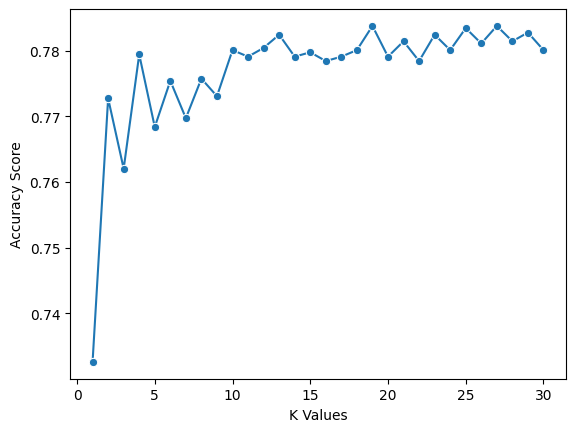

In [167]:
k_values = [i for i in range (1, 31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_all, y['y'], cv=5)
    scores.append(np.mean(score))

sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel('K Values')
plt.ylabel('Accuracy Score')

In [170]:
k = np.argmax(scores)
k

18

## All features

### Training and score in the sample (79% - 0.00 std)

In [152]:
knn_all = KNeighborsClassifier(n_neighbors=k)
knn_all_scores = cross_val_score(
    knn_all,
    X_train_all,
    y_train_all['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    knn_all_scores.mean(),
    knn_all_scores.std())
)

0.79 accuracy with a standard deviation of 0.00


### Out-of-sample score

In [149]:
knn_all = KNeighborsClassifier(n_neighbors=k)
knn_all.fit(X_train_all, y_train_all['y'])
y_test_predict_knn_all = knn_all.predict(X_test_all)

print(classification_report(y_test_all['y'], y_test_predict_knn_all))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       569
           1       0.58      0.11      0.18       178

    accuracy                           0.77       747
   macro avg       0.68      0.54      0.52       747
weighted avg       0.73      0.77      0.70       747



## Univariate - Mutual Information

### Training and score in the sample (77% - 0.00 std)

In [153]:
knn_mi = KNeighborsClassifier(n_neighbors=k)
knn_mi_scores = cross_val_score(
    knn_mi,
    X_train_mi,
    y_train_mi['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    knn_mi_scores.mean(),
    knn_mi_scores.std())
)

0.77 accuracy with a standard deviation of 0.00


### Out-of-sample score

In [154]:
knn_mi = KNeighborsClassifier(n_neighbors=k)
knn_mi.fit(X_train_mi, y_train_mi['y'])
y_test_predict_knn_mi = knn_mi.predict(X_test_mi)

print(classification_report(y_test_mi['y'], y_test_predict_knn_mi))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       594
           1       0.42      0.11      0.18       153

    accuracy                           0.79       747
   macro avg       0.62      0.54      0.53       747
weighted avg       0.73      0.79      0.73       747



## Univariate - $\chi^2$

### Training and score in the sample (78% - 0.01 std)

In [155]:
knn_x2 = KNeighborsClassifier(n_neighbors=k)
knn_x2_scores = cross_val_score(
    knn_x2,
    X_train_x2,
    y_train_x2['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    knn_x2_scores.mean(),
    knn_x2_scores.std())
)

0.78 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [156]:
knn_x2 = KNeighborsClassifier(n_neighbors=k)
knn_x2.fit(X_train_x2, y_train_x2['y'])
y_test_predict_knn_x2 = knn_x2.predict(X_test_x2)

print(classification_report(y_test_x2['y'], y_test_predict_knn_x2))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       581
           1       0.52      0.14      0.23       166

    accuracy                           0.78       747
   macro avg       0.66      0.55      0.55       747
weighted avg       0.74      0.78      0.73       747



## Univariate - ANOVA

### Training and score in the sample (78% - 0.01 std)

In [157]:
knn_anova = KNeighborsClassifier(n_neighbors=k)
knn_anova_scores = cross_val_score(
    knn_anova,
    X_train_anova,
    y_train_anova['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    knn_anova_scores.mean(),
    knn_anova_scores.std())
)

0.78 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [158]:
knn_anova = KNeighborsClassifier(n_neighbors=k)
knn_anova.fit(X_train_anova, y_train_anova['y'])
y_test_predict_knn_anova = knn_anova.predict(X_test_anova)

print(classification_report(y_test_anova['y'], y_test_predict_knn_anova))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       570
           1       0.60      0.08      0.15       177

    accuracy                           0.77       747
   macro avg       0.69      0.53      0.51       747
weighted avg       0.73      0.77      0.70       747



## Multivariate - Relief

### Training and score in the sample (77% - 0.01 std)

In [159]:
knn_relief = KNeighborsClassifier(n_neighbors=k)
knn_relief_scores = cross_val_score(
    knn_relief,
    X_train_relief,
    y_train_relief['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    knn_relief_scores.mean(),
    knn_relief_scores.std())
)

0.77 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [160]:
knn_relief = KNeighborsClassifier(n_neighbors=k)
knn_relief.fit(X_train_relief, y_train_relief['y'])
y_test_predict_knn_relief = knn_relief.predict(X_test_relief)

print(classification_report(y_test_relief['y'], y_test_predict_knn_relief))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       596
           1       0.47      0.13      0.21       151

    accuracy                           0.79       747
   macro avg       0.64      0.55      0.54       747
weighted avg       0.74      0.79      0.75       747



## Wrapper

### Select features

In [ ]:
if RUN_WRAPPER_SELECTION:
    knn_wrapper = KNeighborsClassifier(n_neighbors=k)

    knn_fs_wrapper = SequentialFeatureSelectorTransformer(
        knn_wrapper, n_features_to_select=75)

    print('Fitting model. This may take a while...')
    X_knn_wrapper = knn_fs_wrapper.fit_transform(X_all, y['y'])
    print('We have a winner!')

    X_train_knn_wrapper, X_test_knn_wrapper, y_train_knn_wrapper, y_test_knn_wrapper = split_train_test(X_knn_wrapper, y)
    X_knn_wrapper.to_parquet(STAGE_DIR / 'selection' / 'X_train_knn.parquet')

### Training and score in the sample (80% - 0.01 std)

In [161]:
if not RUN_WRAPPER_SELECTION:
    X_knn_wrapper = pd.read_parquet(STAGE_DIR / 'selection' / 'X_train_knn.parquet')
    X_train_knn_wrapper, X_test_knn_wrapper, y_train_knn_wrapper, y_test_knn_wrapper = split_train_test(X_knn_wrapper, y)

In [162]:
knn_wrapper = KNeighborsClassifier(n_neighbors=k)
knn_wrapper_scores = cross_val_score(
    knn_wrapper,
    X_train_knn_wrapper,
    y_train_knn_wrapper['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    knn_wrapper_scores.mean(),
    knn_wrapper_scores.std())
)

0.80 accuracy with a standard deviation of 0.01


### Out-of-sample score

In [164]:
knn_wrapper = KNeighborsClassifier(n_neighbors=k)
knn_wrapper.fit(X_train_knn_wrapper, y_train_knn_wrapper['y'])
y_test_predict_knn_wrapper = knn_wrapper.predict(X_test_knn_wrapper)

print(classification_report(y_test_knn_wrapper['y'], y_test_predict_knn_wrapper))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87       566
           1       0.75      0.18      0.29       181

    accuracy                           0.79       747
   macro avg       0.77      0.58      0.58       747
weighted avg       0.78      0.79      0.73       747

